# Supervised Learning Project - Thera Bank Personal Loan Campaign
**Author: Pablo Ulises Hernandez Garces**

**link Github: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG**

## Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans

## Data Description
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
## Context
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
## Attribute Information
* ID: Customer ID
* Age: Customer's age in completed years 
* Experience: #years of professional experience
* Income: Annual income of the customer (\$000) 
* ZIP Code: Home Address ZIP code. 
* Family: Family size of the customer 
* CCAvg: Avg. spending on credit cards per month (\$000) 
* Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional
* Mortgage: Value of house mortgage if any. ($000) 
* Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
* Securities Account: Does the customer have a securities account with the bank? 
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Does the customer use internet banking facilities? 
* Credit card: Does the customer use a credit card issued by the bank? 

## Steps and tasks
### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks) 

In [1]:
# Libraries required
import pandas as pd                                             # library for working with dataframes
import numpy as np                                              # library for working with arrays
import matplotlib.pyplot as plt                                 # low level visualization library
%matplotlib inline
import seaborn as sns                                           # higher level visualization library compared to matplotlib

from sklearn.model_selection import train_test_split #split the data into train and test
from sklearn.linear_model import LogisticRegression # import the functions
from sklearn import metrics #see the error parameters
import statsmodels.api as sm


# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]


In [2]:
# Import dataset
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Shape
print('Dimensions of the data set:',data.shape)

print()
# Checking datype
data.info() # This function tell us about the shape, null values and datatype of the dataset.

Dimensions of the data set: (5000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


It seems that there are not null-values in the dataset. Also, all variables are numeric.

In [3]:
# Statistical Summary
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From the above summary, it is strange to have a negative number of years of experience (as it is shown as the minimum of Experience). Lets check how many observations have negative experience.

In [4]:
# checking for negative years of experience. Negative years of experience could be considered as 
# incorrect imputation in the dataset
prop = data.Experience[data.Experience<0].count()/500
num = data.Experience[data.Experience<0].count()

print('Proportion of negative years of experience: % f '% prop + "%") # in %
print('Observations of negative years of experience: % d '% num) 
data[data.Experience<0]
#sns.distplot(data.Experience)

Proportion of negative years of experience:  0.104000 %
Observations of negative years of experience:  52 


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


Based on above results, there are two options: impute years of experience of those 52 observations or drop them and work with the rest 4948 observations (98.96% of total). Due to these observations are not big in number, I will drop them in order to have a more consistent dataset to work on and because imputation of this variable is not so direct.

In [5]:
# Dropping negative years of experience and verifying the consistence of the rest of variables
data.drop(data.Experience[data.Experience<0].index,inplace=True)
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks) 
* Number of unique in each column? 
* Number of people with zero mortgage? 
* Number of people with zero credit card spending per month? 
* Value counts of all categorical columns. 
* Univariate and Bivariate 
* Get data model ready 

In [6]:
# Number of unique values in each column
data.nunique()

ID                    4948
Age                     44
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
# Number of people with zero mortgage
n = data[data.Mortgage==0].shape[0]
m = n/data.shape[0]*100
print("There are %d people with zero mortgage" %n)
print("This represents a percentage of %f of the total" %m)

There are 3422 people with zero mortgage
This represents a percentage of 69.159256 of the total


In [8]:
# Number of people with zero credit card spending per month
n = data[data.CCAvg==0].shape[0]
m = n/data.shape[0]*100
print("There are %d people with zero credit card spending per month" %n)
print("This represents a percentage of %f of the total" %m)

There are 106 people with zero credit card spending per month
This represents a percentage of 2.142280 of the total


In [9]:
# Value counts of all categorical columns
categos = ["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]
for i in categos:
    print(i)
    print(data[i].value_counts())
    print()

Family
1    1470
2    1274
4    1203
3    1001
Name: Family, dtype: int64

Education
1    2080
3    1481
2    1387
Name: Education, dtype: int64

Personal Loan
0    4468
1     480
Name: Personal Loan, dtype: int64

Securities Account
0    4432
1     516
Name: Securities Account, dtype: int64

CD Account
0    4646
1     302
Name: CD Account, dtype: int64

Online
1    2954
0    1994
Name: Online, dtype: int64

CreditCard
0    3493
1    1455
Name: CreditCard, dtype: int64



Age


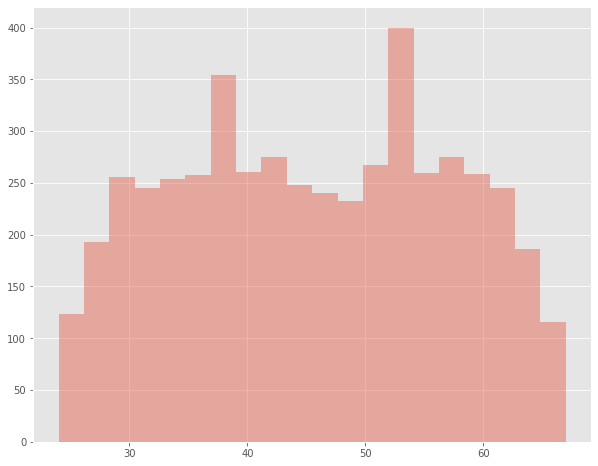

Experience


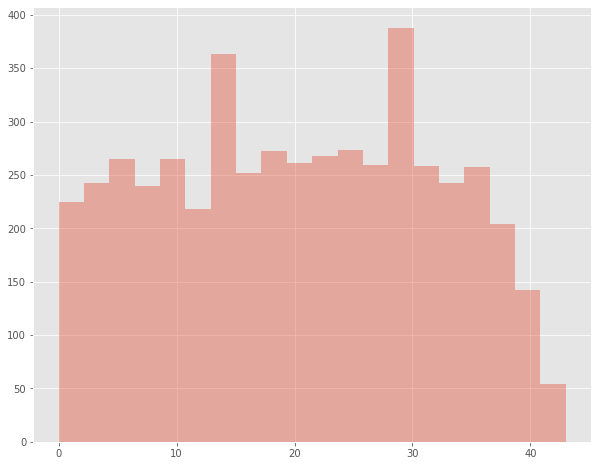

Income


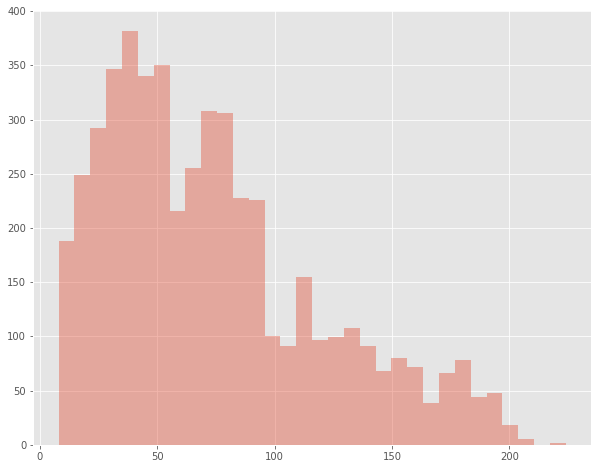

ZIP Code


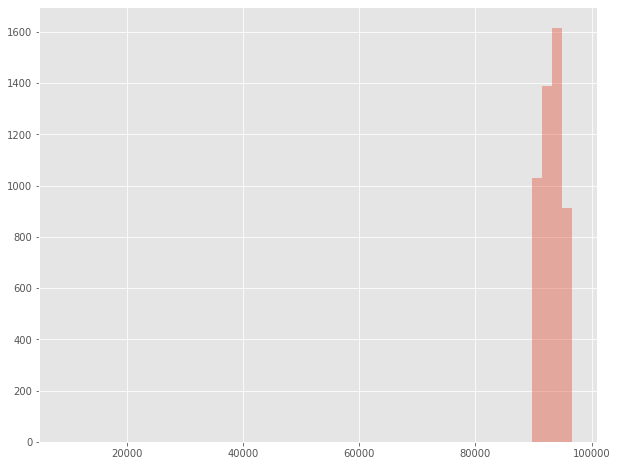

Family


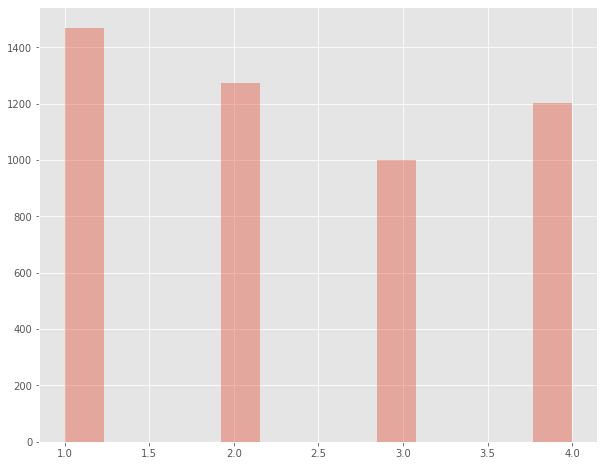

CCAvg


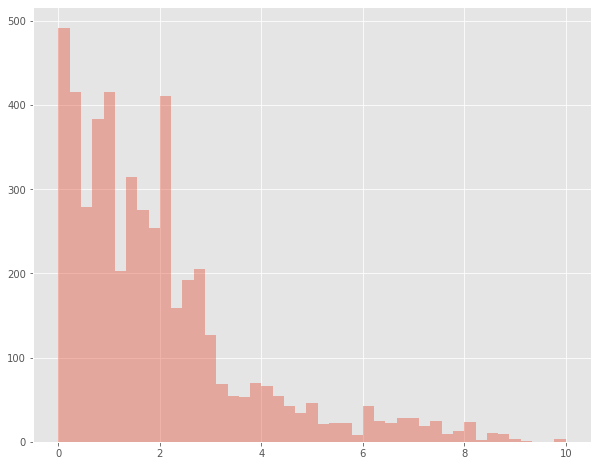

Education


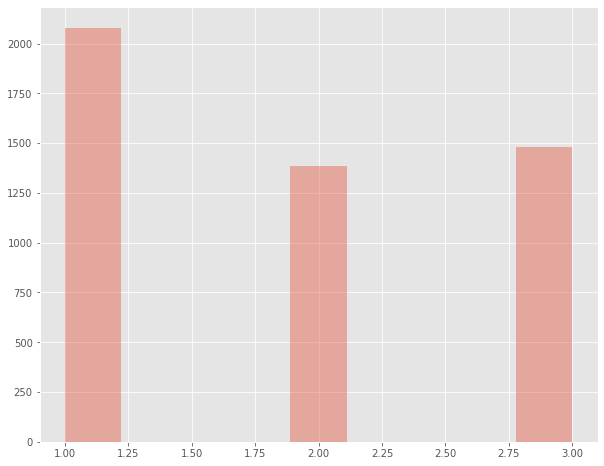

Mortgage


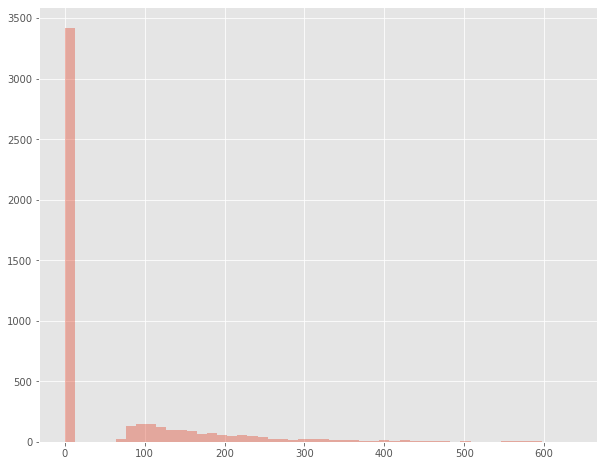

Personal Loan


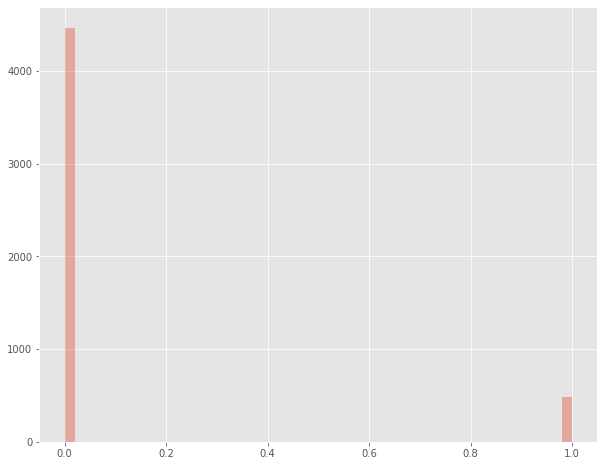

Securities Account


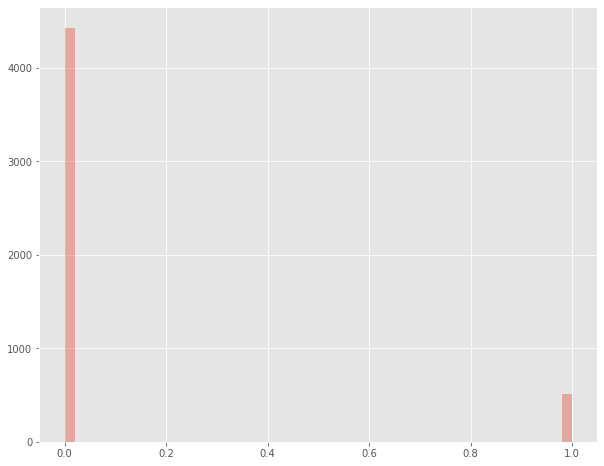

CD Account


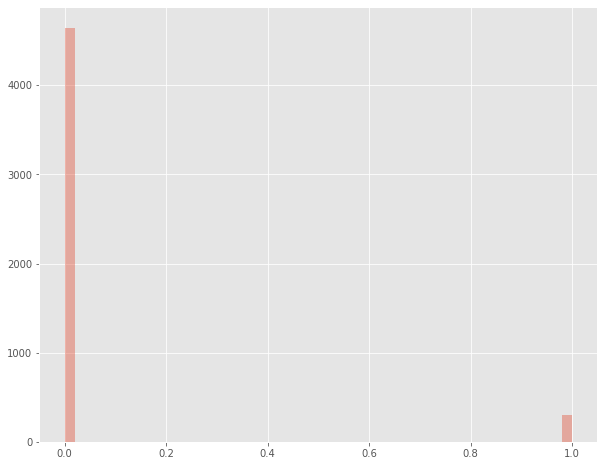

Online


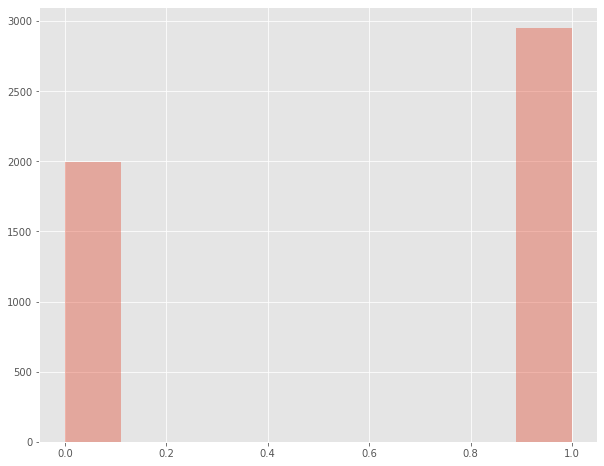

CreditCard


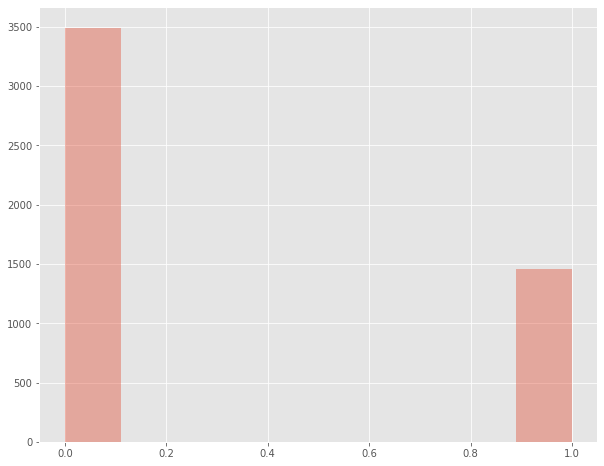

In [10]:
# Univariate and Bivariate plots

for i in range(1,14):
    print(data.columns[i])
    sns.distplot(data[[data.columns[i]]],kde=False)
    plt.show()

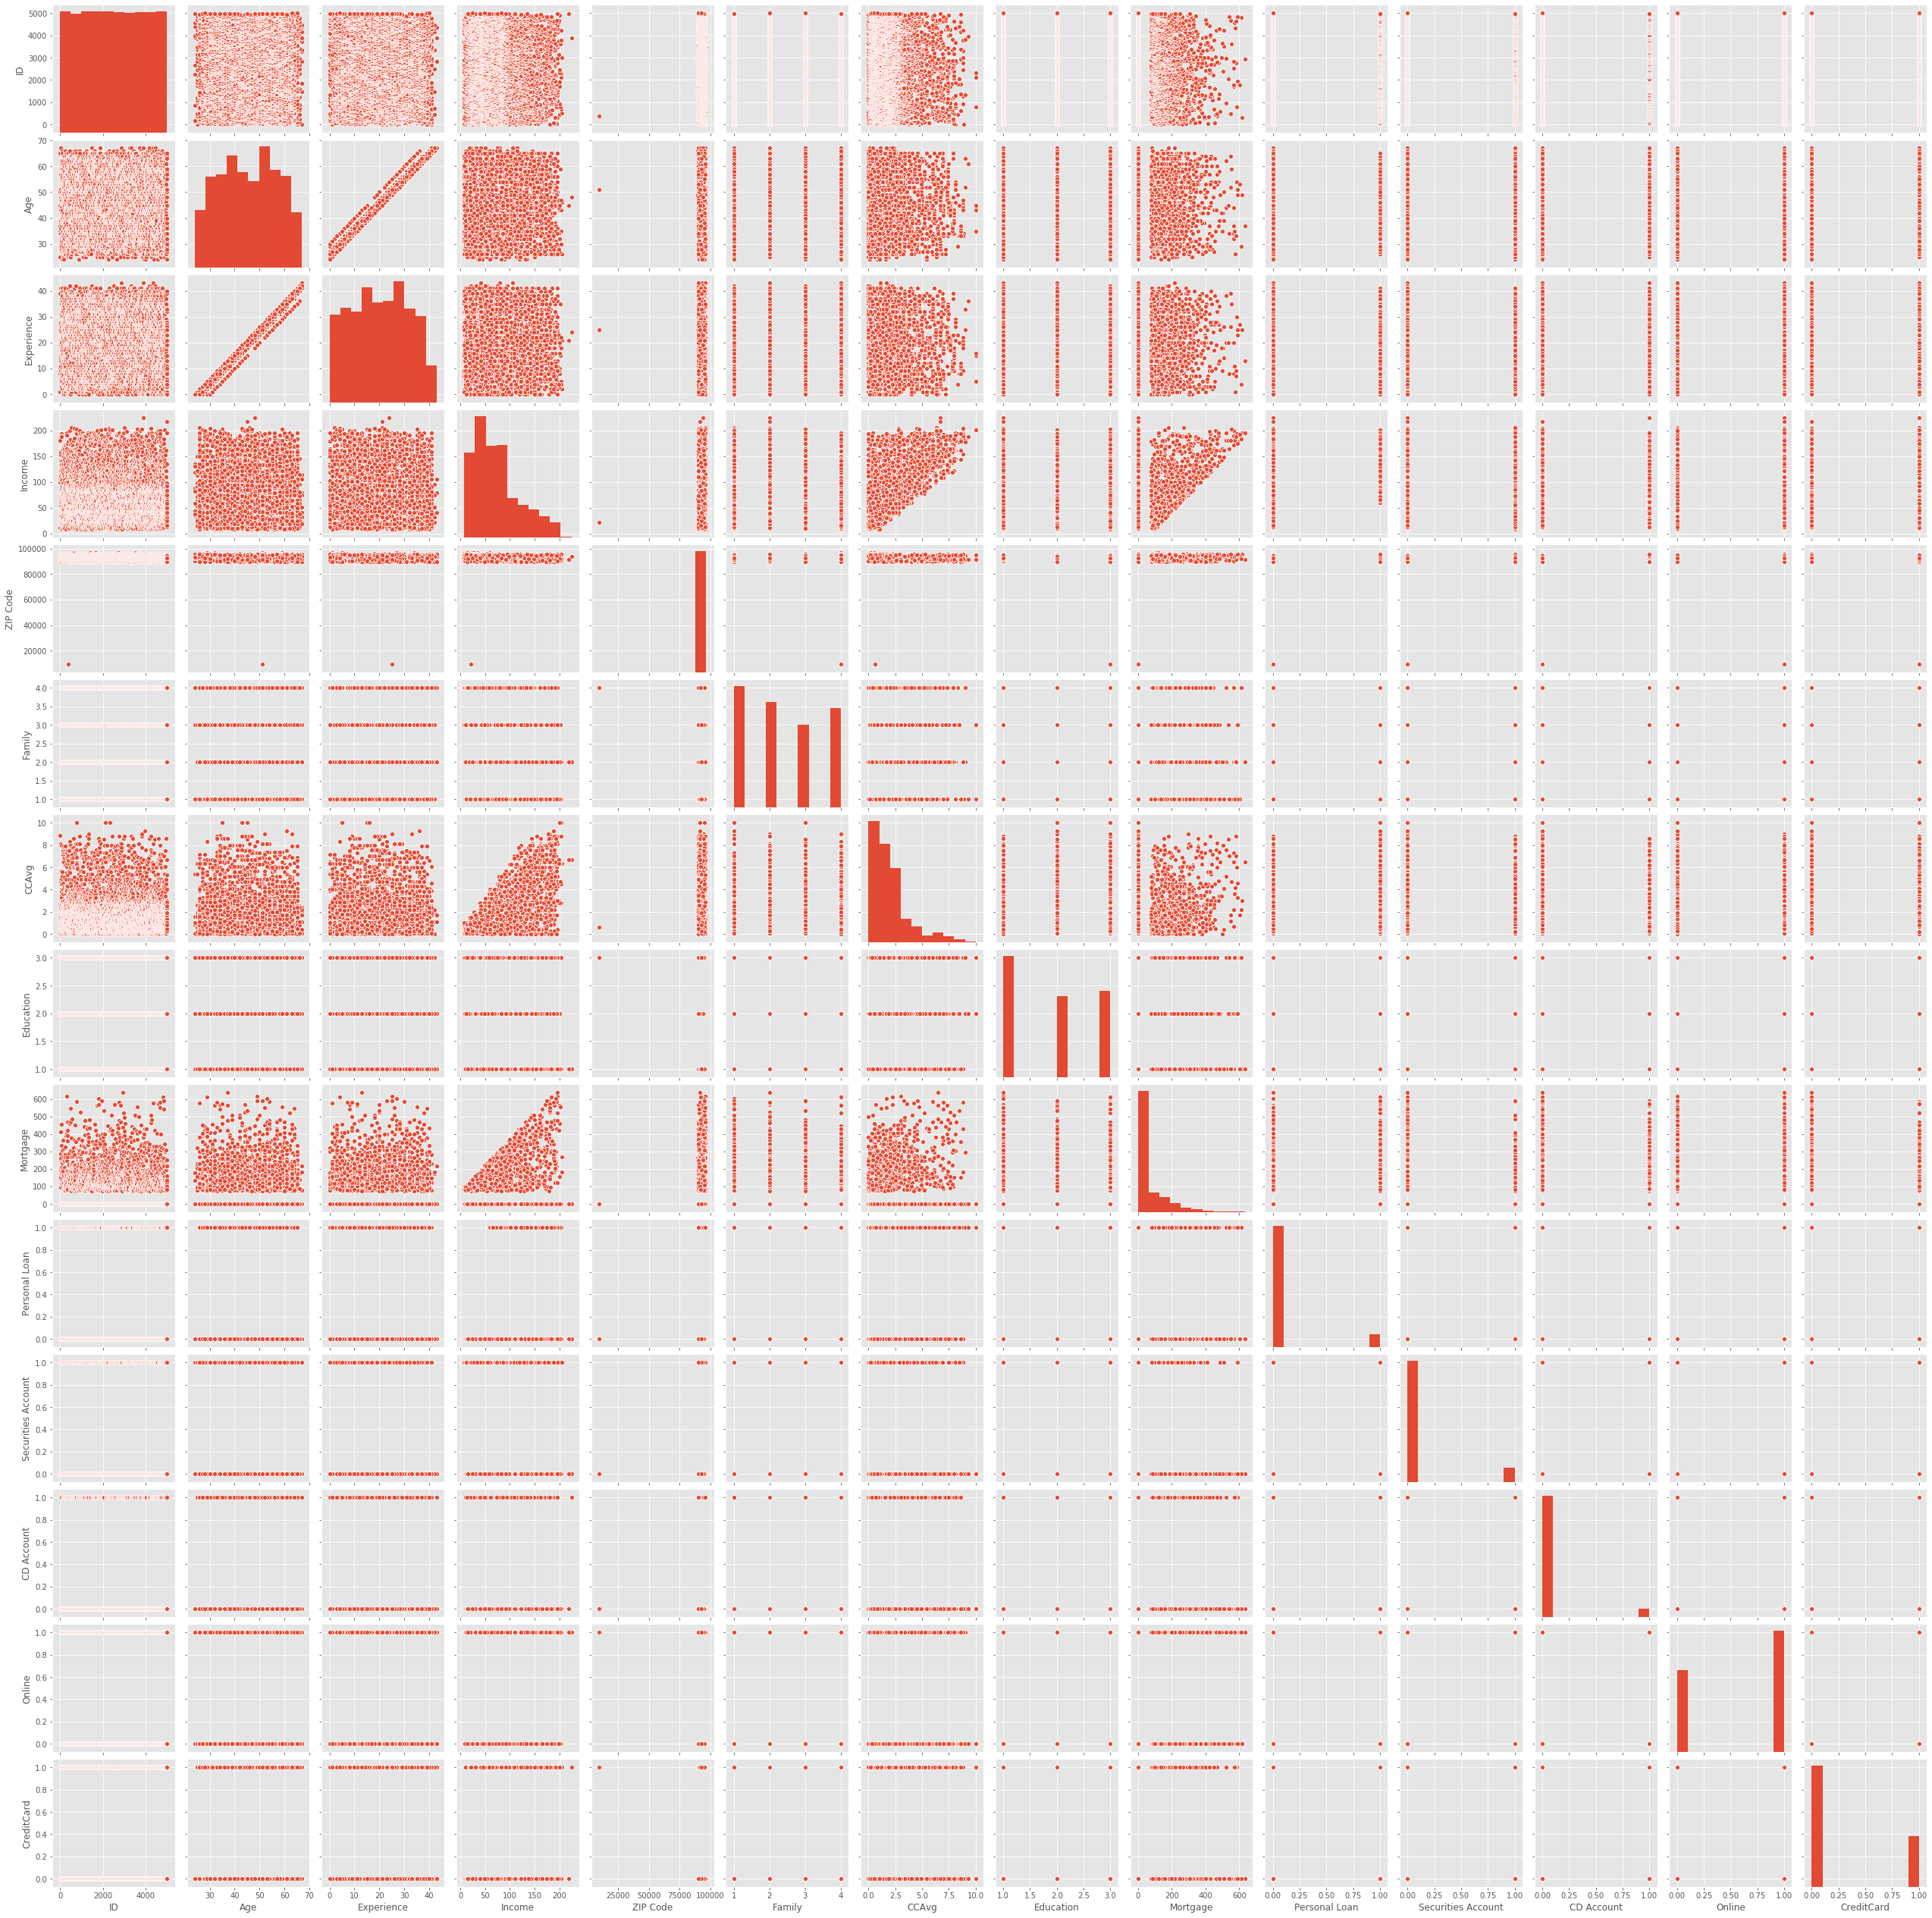

In [11]:
# Bivariate plots
sns.pairplot(data) # all variables


In this case, the distribution plots shown by pairplot function do not show very well the relation between the "Personal Loan" variable and the rest of them. This can be explained because "Personal Loan" is a categorical variable, so we can plot all distribution of the variables divided by category (whether a person has a Personal Loan). This can be achieved using boxpots and heatmaps

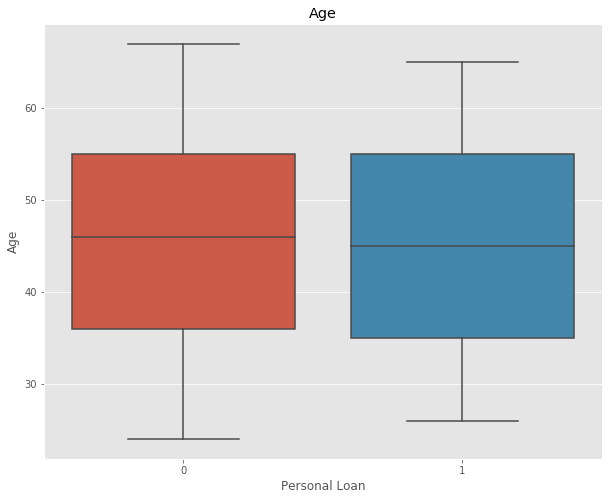

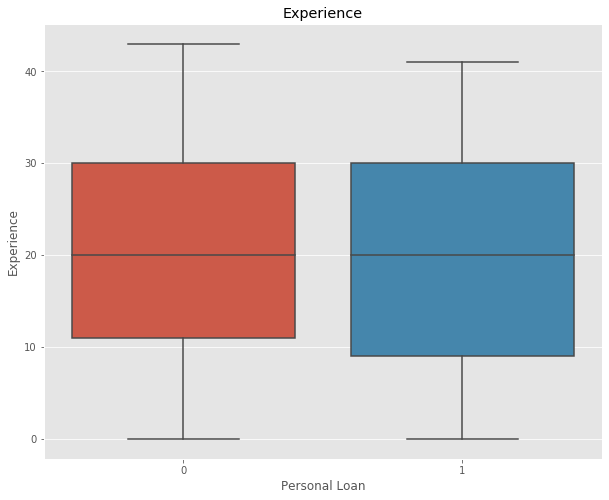

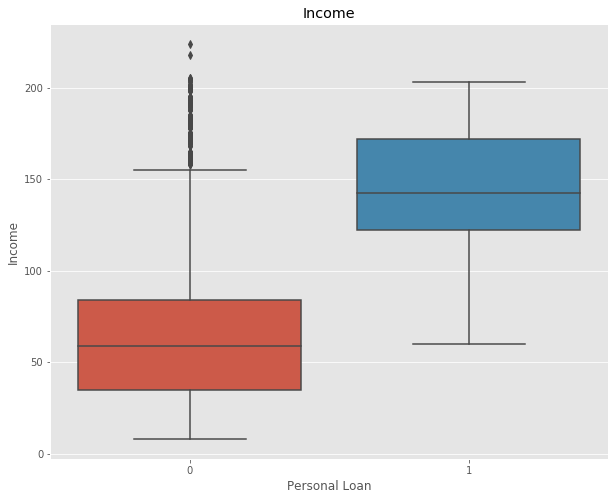

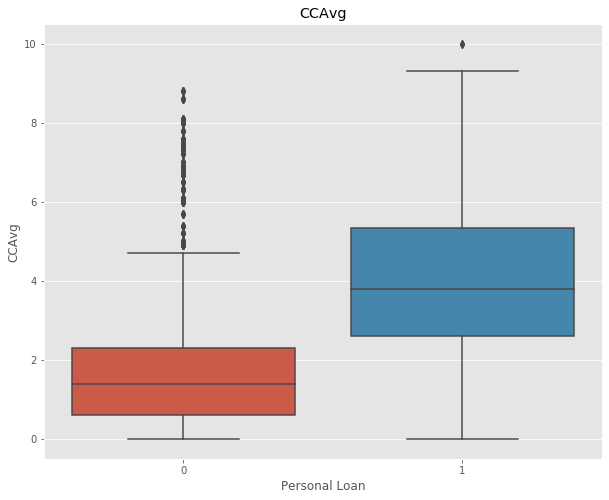

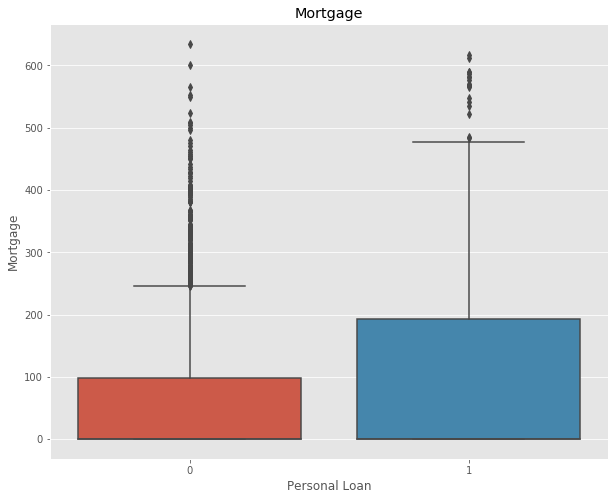

In [12]:
# Bivariate plots (all numeric variables divided by Personal Loan) using boxplots
ind = ["Age","Experience","Income","CCAvg","Mortgage"]

for i in ind:
    sns.boxplot(y=i,x="Personal Loan",data=data,)
    plt.title(i)
    plt.show()


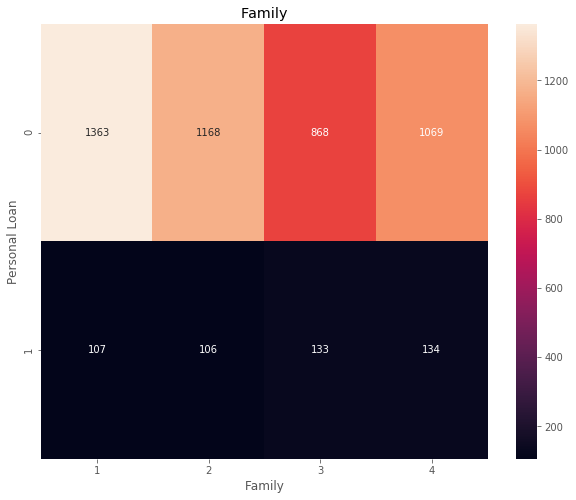

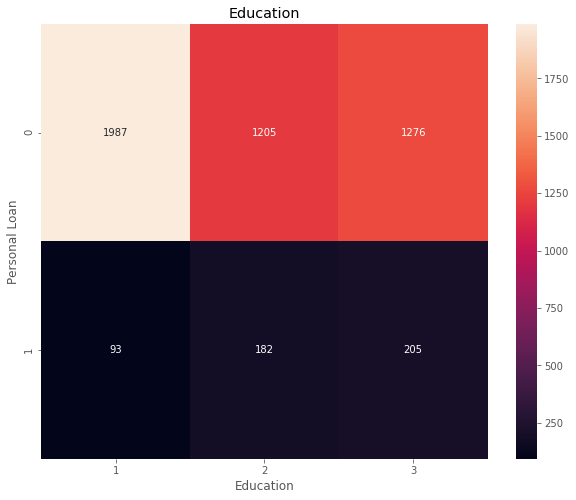

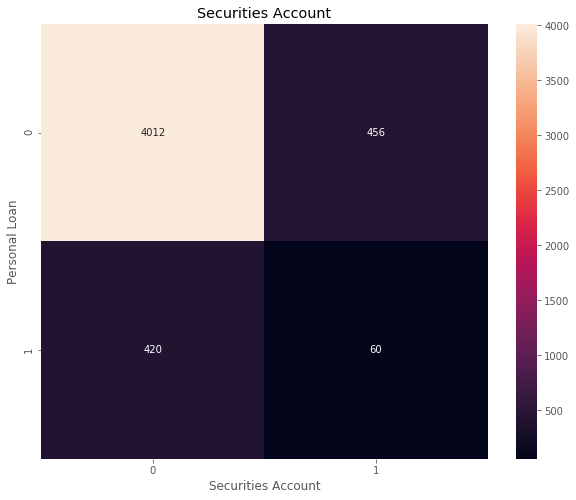

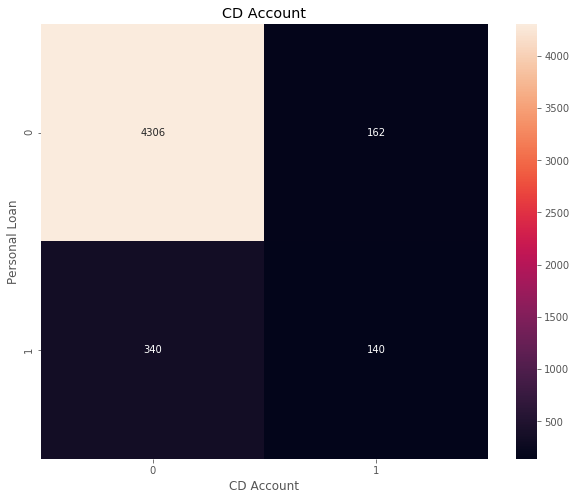

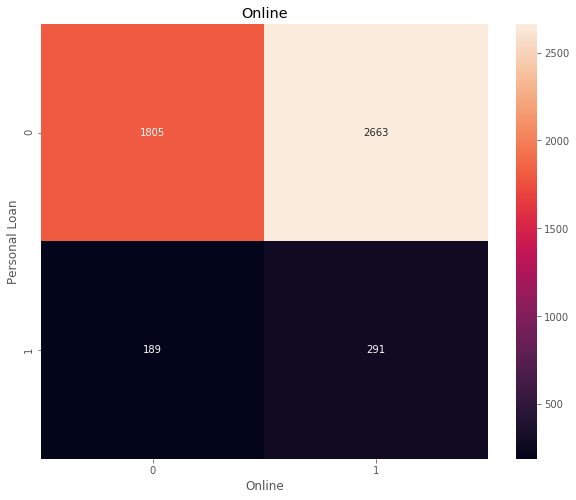

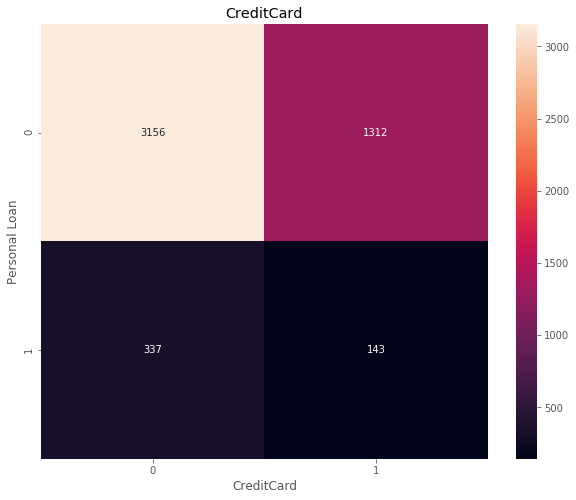

In [13]:
# Bivariate plots (all categorical variables divided by Personal Loan) using heatmaps

ind = ["Family","Education","Securities Account","CD Account","Online","CreditCard"]


for i in ind:
    tables = pd.crosstab(index=data["Personal Loan"],  # Make a crosstab
                      columns=data[i]) 

    sns.heatmap(tables,annot=True,fmt="d")
    plt.title(i)
    plt.show()


These heatmaps give us more information about how people are distributed across all the categories. For example, most of people who do not have personal loan neither have family, this could tell us that may be they do not needed it. Similarly with the distribution of people by education and Credit Card.


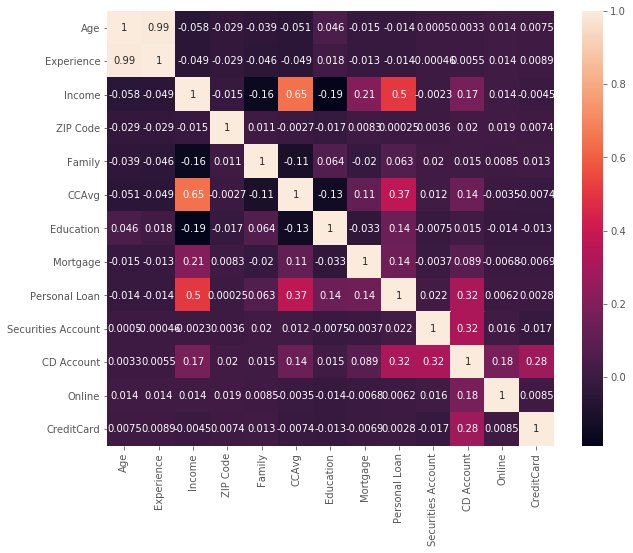

In [14]:
# Correlation
correlation = data.drop("ID",axis=1).corr()
sns.heatmap(correlation,annot=True);

From the correlation heatmap we can see that variables Age and Experience are very strong correlated, and it is logical. So we can drop one of them in order to have independent variables. In the rest of the variables we can see really low correletion between them and this is good for the model.

In [15]:
# Get data model ready

# Converting categorical data
data[["Family","Education","Securities Account","CD Account","Online","CreditCard"]] = data[["Family","Education","Securities Account","CD Account","Online","CreditCard"]].astype("category")

# Dropping unnecessary variables and very high correlated ones
data_model = data.drop(["ID","Experience"],axis=1)
data_model = pd.get_dummies(data_model,drop_first=True)

In [16]:
data_model.head()

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,49,91107,1.6,0,0,0,0,1,0,0,1,0,0,0
1,45,34,90089,1.5,0,0,0,1,0,0,0,1,0,0,0
2,39,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,94112,2.7,0,0,0,0,0,1,0,0,0,0,0
4,35,45,91330,1.0,0,0,0,0,1,1,0,0,0,0,1


### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks) 


In [17]:
# Split data into training and test sets (70:30)

x = data_model.drop("Personal Loan",axis=1)
y= data_model["Personal Loan"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)


### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks) 


In [18]:
# Logistic regression to predict number of costumers buying personal loans

# First model: all variables

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)

# Coefficients
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = x_train.columns
coef_df['intercept'] = model.intercept_
print(coef_df)

        Age   Income  ZIP Code     CCAvg  Mortgage  Family_2  Family_3  \
0  0.010251  0.03571  -0.00007  0.009741  0.000794 -0.007029  0.006626   

   Family_4  Education_2  Education_3  Securities Account_1  CD Account_1  \
0  0.007043      0.01041     0.009725               0.00233      0.008737   

   Online_1  CreditCard_1  intercept  
0 -0.001305     -0.000811  -0.000136  


In [19]:
# probabilities
print("Probabilities:",model.predict_proba(x_test)[:,1])

# metrics of performance 

# Train
model_score_train = model.score(x_train, y_train)
print("Score of training set: %f" %model_score_train)

# Test
model_score = model.score(x_test, y_test)
print("Score of test set: %f" %model_score)


Probabilities: [0.28593867 0.3185381  0.13280748 ... 0.05309334 0.01597554 0.08611135]
Score of training set: 0.910482
Score of test set: 0.901010


It is noted that both scores are pretty similar. With a slightly greater score of training set than the test set, we could think about overfitting, but the difference is not so relevant.

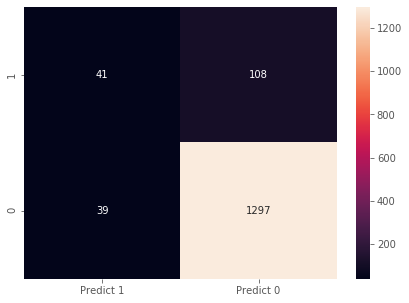

In [20]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="d");

In [21]:
# Metrics of performance

# Accuracy: (TP + FN)/ (TP +TN + FN + FT)
acc = metrics.accuracy_score(y_test,y_predict)*100
print("Accuracy:",acc)
print()

# True Positive Rate (Recall or Sensitivity): TP/(TP + FN) Out of all actual positives how many did I classified well
print("True Positive Rate:",100*metrics.recall_score(y_test,y_predict))
print()

# True Negative rate (Specificity): TN/(TN + FP) Out of all actual negatives how many did I classified well
specificity = df_cm.iloc[1,1]/(df_cm.iloc[1,1] + df_cm.iloc[0,1])*100
print("True Negative Rate:",specificity)
print()

# False Negative Rate (1-specificity)
print("False Negative Rate:",100-specificity)
print()


print(df_cm)

Accuracy: 90.1010101010101

True Positive Rate: 27.516778523489933

True Negative Rate: 92.31316725978648

False Negative Rate: 7.686832740213518

   Predict 1  Predict 0
1         41        108
0         39       1297


In [22]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 1

fpr[0], tpr[0], _ = metrics.roc_curve(y_test, y_predict)
roc_auc[0] = metrics.auc(fpr[0], tpr[0])


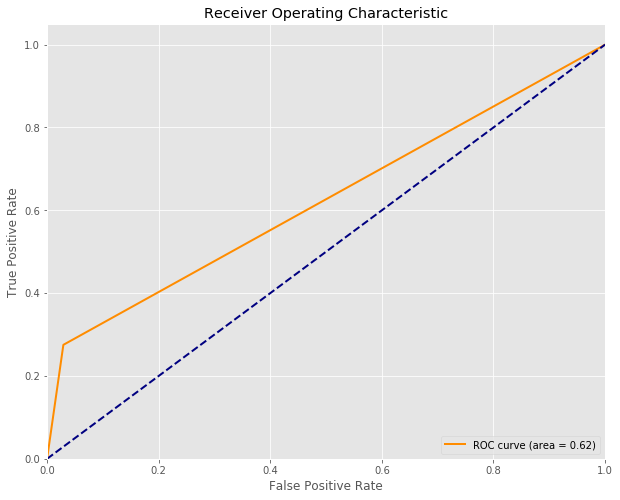

In [23]:
# plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

We want to analize data in order to create a new strategy that generates more conversion rate (than the actual 9%). In this sense we are more interested on the True Positives Rate, which indicates how well our model predict those people that are more likely to take a Personal Loan and that our campaign must focus on. Thus, we want to minimize the False positive class, which indicates those people that the campaing will not work and that results in a loss for the bank

What about False negatives? Well, these people that is actually very likely to take a personal loan could get one without the effort of the bank, so this class could be not so relevant, in this case.

Finally, the model that performs better could give us the caracteristics that are more relevant in a user to take a personal loan.



### 5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter 

In [24]:
# How can the model perform better?

# Based on the performance results of our first model, I can say that it does not classify very well,
# due to its True positive rates is about 27.5%. In order to improve this measure, I will select the 
# more relevan variables for the model

# Analyzing the coefficients of the variables and the impact of dropping it, we can drop the following variables:
# ZIP Code (performs better without it, does not provide info to the model)
# Age (does not change the performance when drop it, so does not provide value to the model and we have a more simple model)
# Mortgage (sames as Age)

In [25]:

x = data_model.drop(["Personal Loan","ZIP Code","Age","Mortgage"],axis=1)
y= data_model["Personal Loan"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)


In [26]:
# Fit the model on train
model2 = LogisticRegression(solver="liblinear")
model2.fit(x_train, y_train)

#predict on test
y_predict = model2.predict(x_test)

# Coefficients
coef_df = pd.DataFrame(model2.coef_)
coef_df.columns = x_train.columns
coef_df['intercept'] = model2.intercept_
print(coef_df)

# scores
print("Score of training:",model2.score(x_train, y_train))
print()
print("Score of test:",model2.score(x_test, y_test))

     Income     CCAvg  Family_2  Family_3  Family_4  Education_2  Education_3  \
0  0.046581  0.115776 -0.303882  1.228622  0.982167     2.453215     2.532273   

   Securities Account_1  CD Account_1  Online_1  CreditCard_1  intercept  
0             -0.461877      3.058837 -0.767125     -0.974464  -8.933037  
Score of training: 0.9555298873808836

Score of test: 0.9569023569023569


We can see that the score of training is slightly less than the score of test, but they are pretty similar. This suggests that there is no overfitting.

In [27]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm2 = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

print(df_cm2)
print()

# Accuracy: (TP + FN)/ (TP +TN + FN + FT)
acc = metrics.accuracy_score(y_test,y_predict)*100
print("Accuracy:",acc)
print()

# True Positive Rate (Recall or Sensitivity): TP/(TP + FN) Out of all actual positives how many did I classified well
print("True Positive Rate:",100*metrics.recall_score(y_test,y_predict))
print()

# True Negative rate (Specificity): TN/(TN + FP) Out of all actual negatives how many did I classified well
specificity = df_cm.iloc[1,1]/(df_cm.iloc[1,1] + df_cm.iloc[0,1])*100
print("True Negative Rate:",specificity)
print()

# False Negative Rate (1-specificity)
print("False Negative Rate:",100-specificity)
print()

   Predict 1  Predict 0
1         99         50
0         14       1322

Accuracy: 95.6902356902357

True Positive Rate: 66.44295302013423

True Negative Rate: 92.31316725978648

False Negative Rate: 7.686832740213518



With this model I increased the True Positive Rate to almost 2/3, that could help us to create a strategy with more confidence.

In [28]:
# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
n_classes = 1

fpr2[0], tpr2[0], _ = metrics.roc_curve(y_test, y_predict)
roc_auc2[0] = metrics.auc(fpr2[0], tpr2[0])


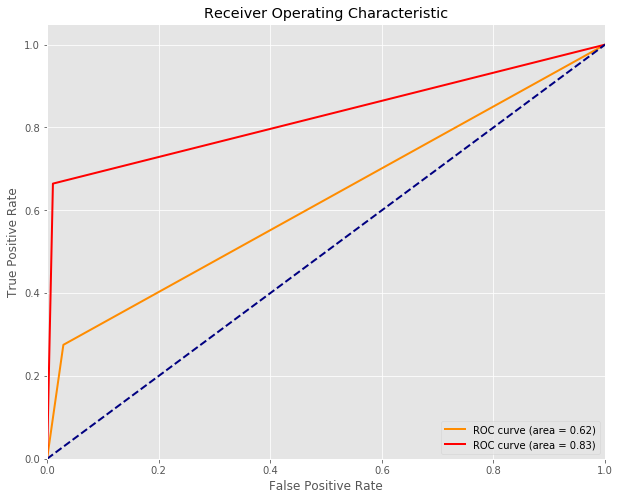

In [29]:
# plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr2[0], tpr2[0], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2[0])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The second model (red line) performs much better than the first one, having less variables and with a higher True Positive Rate. i.e. more interpretability and better Recall.

### 6. Give Business understanding of your model? (5 marks) 

In [30]:
# Business understanding of the model
print(coef_df)

     Income     CCAvg  Family_2  Family_3  Family_4  Education_2  Education_3  \
0  0.046581  0.115776 -0.303882  1.228622  0.982167     2.453215     2.532273   

   Securities Account_1  CD Account_1  Online_1  CreditCard_1  intercept  
0             -0.461877      3.058837 -0.767125     -0.974464  -8.933037  


The best model I adjusted include the variables Income, CCAvg, Family, Education, Securities Account, Online and CreditCard.

When using the sigmoid function the greater the coefficient of a variable, the greater the probability. So the more relevant variables for our model are those which have the higher coefficientes: CCAvg, Education, CD Account. This, in purely mathematical terms. However, there are variables that are so relevant that when dropping them the model can not classify well, such as Income.

Based on the results shown above, and the interpretation of the variables I mentioned before, we can suggest to the bank to focus on those people who have family (more or equal than 3), with a higher level of education and with a CD Account (also could be benefical to include those who neither use online services nor have credit card). This without ignore those natural variables such as the income and CCAvg. 